In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy import stats

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('aug_train.csv')

In [3]:
df.head(5)

enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM          5          NaN             NaN        never   
3  Business Degree         <1          NaN         Pvt Ltd        never   
4             STEM        >20        50-99  Funded Startup            4   

   training_hours  target  
0              36     1.0  
1              47     0.0  
2              83     0.0  
3              52     1.0  
4               8     0.0

In [4]:
#Выведем информацию о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [5]:
print("Процент доступных данных (не NAN):")
df.count()/len(df)

Процент доступных данных (не NAN):


enrollee_id               1.000000
city                      1.000000
city_development_index    1.000000
gender                    0.764694
relevent_experience       1.000000
enrolled_university       0.979852
education_level           0.975989
major_discipline          0.853168
experience                0.996607
company_size              0.690051
company_type              0.679507
last_new_job              0.977920
training_hours            1.000000
target                    1.000000
dtype: float64

In [6]:
#Посмотрим на уникльные значения в разных столбцах
for i in ['gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']:
    print(np.unique(df[i].tolist()))

['Female' 'Male' 'Other' 'nan']
['Has relevent experience' 'No relevent experience']
['Full time course' 'Part time course' 'nan' 'no_enrollment']
['Graduate' 'High School' 'Masters' 'Phd' 'Primary School' 'nan']
['Arts' 'Business Degree' 'Humanities' 'No Major' 'Other' 'STEM' 'nan']
['1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '3' '4'
 '5' '6' '7' '8' '9' '<1' '>20' 'nan']
['10/49' '100-500' '1000-4999' '10000+' '50-99' '500-999' '5000-9999'
 '<10' 'nan']
['Early Stage Startup' 'Funded Startup' 'NGO' 'Other' 'Public Sector'
 'Pvt Ltd' 'nan']
['1' '2' '3' '4' '>4' 'nan' 'never']


In [7]:
#Обработаем данные и заполним пропущенные значения
def data_processing(df):
  #Считаем, что если experience не указан, то это 0, все что <1 тоже 0, а >20 это 21
  df['experience'][df['experience']=='>20'] = 21 
  df['experience'][df['experience']=='<1'] = 0
  df['experience'] = df['experience'].fillna(0) 
  df['experience'] = df['experience'].astype(int)

  #Считаем, что если значение last_new_job не указано, то это 0, все что never тоже 0, а >4 это 5
  df['last_new_job'][df['last_new_job']=='>4'] = 5
  df['last_new_job'][df['last_new_job']=='never'] = 0
  df['last_new_job'] = df['last_new_job'].fillna(0) 
  df['last_new_job'] = df['last_new_job'].astype(int)

  #Если значение company_size не указано, то это <10
  df['company_size'] = df['company_size'].fillna('<10')

  #Так как в столбце присутствуют значения other, то обозначим так же и все пропущенные
  df['gender'] = df['gender'].fillna('Other')

  #Так как в столбце присутствуют значения other, то обозначим так же и все пропущенные
  df['company_type'] = df['company_type'].fillna('Other')

  #Уберем слово city, чтобы работать исключительно с числовыми переменными 
  df['city'] = df['city'].str.replace('city_','')
  df['city'] = df['city'].astype(int)

  #Я считаю, что эти столбцы не несут никакой пользы
  df = df.drop(['enrollee_id'], axis=1)
  df = df.drop(['major_discipline'], axis=1)

  #Если значение education_level отстутствует, то заполним его наименьшим возможным, в данном случае это Primary School
  df['education_level'] = df['education_level'].fillna('Primary School')

  #Аналогично с предыдущем столбцом
  df['enrolled_university'] = df['enrolled_university'].fillna('no_enrollment')
  
  return df

In [9]:
df = data_processing(df)

In [10]:
print("Процент доступных данных (не NAN):")
df.count()/len(df)

Процент доступных данных (не NAN):


city                      1.0
city_development_index    1.0
gender                    1.0
relevent_experience       1.0
enrolled_university       1.0
education_level           1.0
experience                1.0
company_size              1.0
company_type              1.0
last_new_job              1.0
training_hours            1.0
target                    1.0
dtype: float64

In [11]:
#Рассмотрим параметры распределений числовых признаков
df[['city_development_index', 'experience', 'training_hours', 'last_new_job']].describe()

city_development_index    experience  training_hours  last_new_job
count            19158.000000  19158.000000    19158.000000  19158.000000
mean                 0.828848     10.065873       65.366896      1.956258
std                  0.123362      6.790963       60.058462      1.682866
min                  0.448000      0.000000        1.000000      0.000000
25%                  0.740000      4.000000       23.000000      1.000000
50%                  0.903000      9.000000       47.000000      1.000000
75%                  0.920000     16.000000       88.000000      3.000000
max                  0.949000     21.000000      336.000000      5.000000

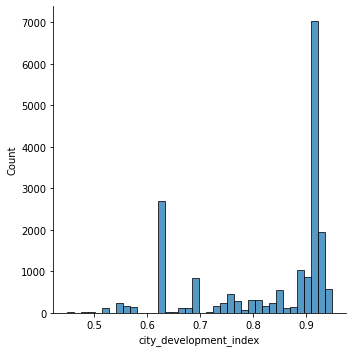

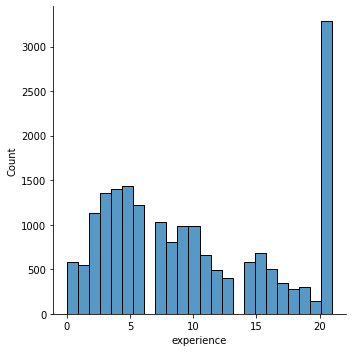

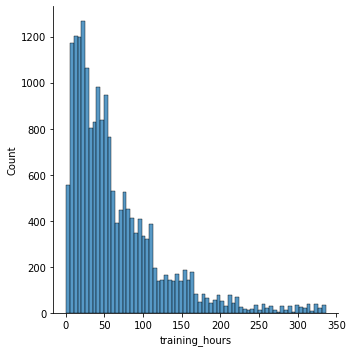

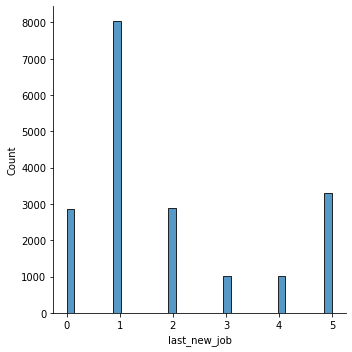

In [12]:
#Рассмотрим гистограммы распределений числовых признаков
for i in ['city_development_index', 'experience', 'training_hours', 'last_new_job']:
  sns.displot(x=i, data=df)

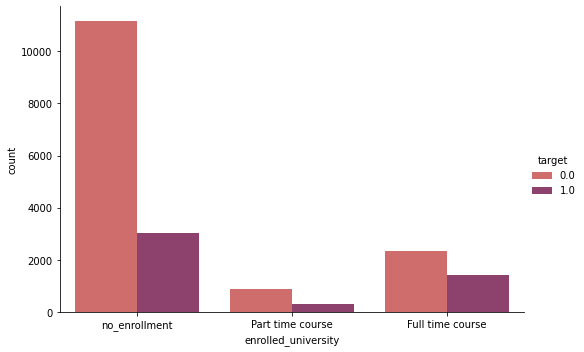

In [13]:
#Далее рассмотрим несколько гистограмм категориальных признаков в зависимости от целевой перееменной
sns.catplot(x="enrolled_university", kind="count", data=df, height=5, aspect=1.5, palette="flare", hue='target', order= ['no_enrollment','Part time course','Full time course'])

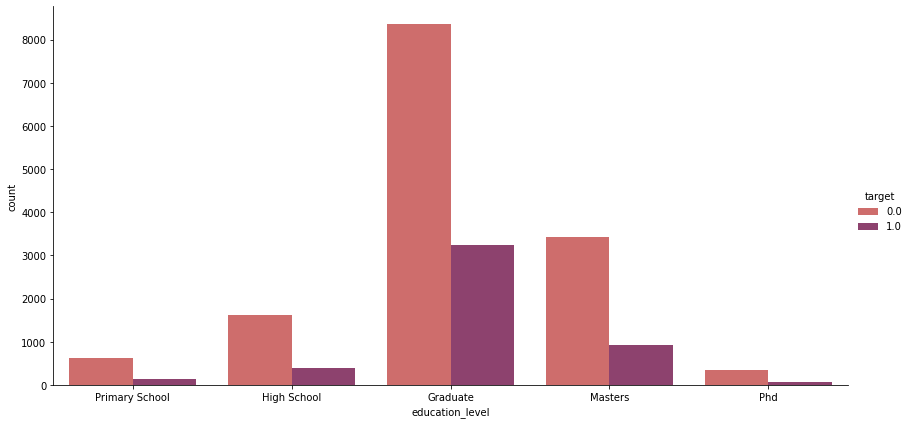

In [14]:
sns.catplot(x="education_level", kind="count", data=df, height=6, aspect=2, palette="flare", hue='target',order= ['Primary School','High School','Graduate','Masters','Phd'])

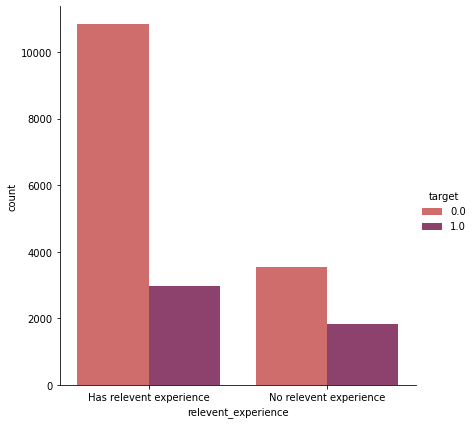

In [15]:
sns.catplot(x="relevent_experience", kind="count", data=df, height=6, aspect=1, palette="flare",hue='target')

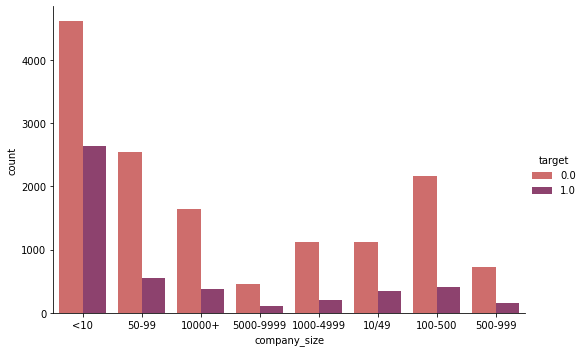

In [16]:
sns.catplot(x="company_size", kind="count", data=df, height=5, aspect=1.5, palette="flare",hue='target')

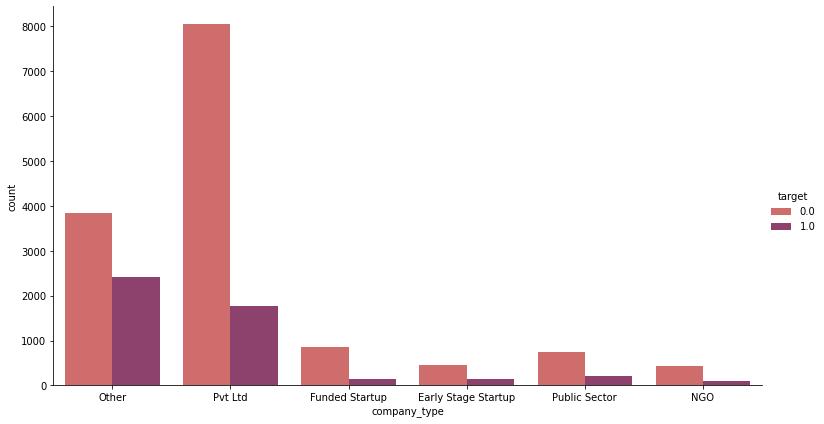

In [17]:
sns.catplot(x="company_type", kind="count", data=df, height=6, aspect=1.8, palette="flare", hue='target')

In [18]:
#Рассмотрим несколько сводных таблиц по наиболее интересным признакам
size_and_type = pd.crosstab(df["company_size"], df["company_type"])
size_and_type

company_type  Early Stage Startup  Funded Startup  NGO  Other  Public Sector  \
company_size                                                                   
10/49                         176             193   32    117             43   
100-500                        27             214  174    172            151   
1000-4999                       0               0   73     74            165   
10000+                          0               0   37     93            150   
50-99                         109             390   77    240            116   
500-999                         2              54   37     75             87   
5000-9999                       0               0   29     43             79   
<10                           289             150   62   5447            164   

company_type  Pvt Ltd  
company_size           
10/49             910  
100-500          1833  
1000-4999        1016  
10000+           1739  
50-99            2151  
500-999           622  
5000-9999         412  
<10              1134

In [19]:
size_and_experience = pd.crosstab(df["company_size"], df["relevent_experience"])
size_and_experience

relevent_experience  Has relevent experience  No relevent experience
company_size                                                        
10/49                                   1248                     223
100-500                                 2234                     337
1000-4999                               1102                     226
10000+                                  1641                     378
50-99                                   2683                     400
500-999                                  745                     132
5000-9999                                461                     102
<10                                     3678                    3568

In [20]:
type_and_experience = pd.crosstab(df["company_type"], df["relevent_experience"])
type_and_experience

relevent_experience  Has relevent experience  No relevent experience
company_type                                                        
Early Stage Startup                      509                      94
Funded Startup                           905                      96
NGO                                      365                     156
Other                                   3075                    3186
Public Sector                            558                     397
Pvt Ltd                                 8380                    1437

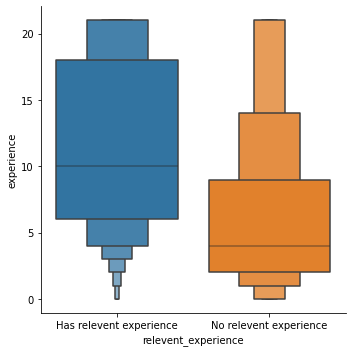

In [21]:
#Построим boxplot для столбца experience в зависимости от relevant_experience
g = sns.catplot(x="relevent_experience", y="experience", kind="boxen", data=df)

<AxesSubplot:>

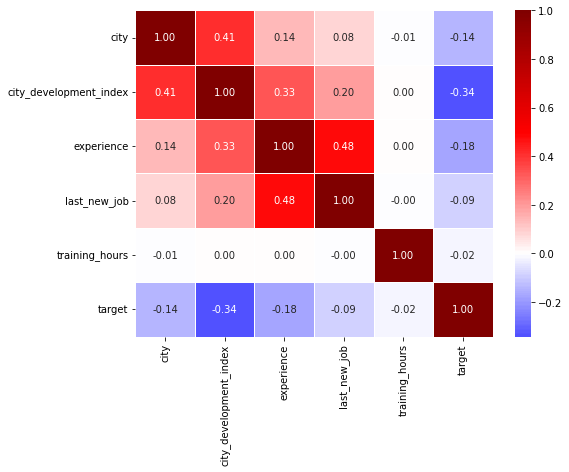

In [22]:
#Рассмотрим матрицу корреляций между признаками
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), cmap="seismic", center=0, annot=True, fmt=".2f", linewidths=.5)

In [23]:
#Посмотрим распределение значений experience в зависимости от company_type
df_agg = df.groupby('company_type')['experience'].agg(['mean', 'std', 'count'])
df_agg

mean       std  count
company_type                                   
Early Stage Startup   8.028192  5.953937    603
Funded Startup       10.672328  6.307022   1001
NGO                  10.422265  6.971798    521
Other                 8.623063  6.902799   6261
Public Sector        10.619895  6.729968    955
Pvt Ltd              10.976571  6.627662   9817

In [24]:
#Для применений последующих статистических гипотез требуется величина, распределенная нормально

<AxesSubplot:>

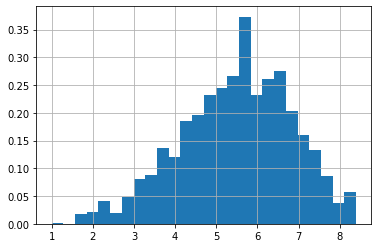

In [25]:
#Сделаем распределение training_hours похожим на нормальное
np.log2(df.training_hours+1).hist(bins=26, density=True)

In [26]:
df['training_hours_norm'] = np.log2(df.training_hours+1)

In [27]:
#Проверим гипотезу о том, что мужчины и женщины в среднем учились одинаковое количество часов
Male_training_hours_norm = df[df['gender']=='Male']['training_hours_norm']
Female_training_hours_norm = df[df['gender']=='Female']['training_hours_norm']

# Так как распределение теперь похоже на нормальное, то берем Критерий Стьюдента

t, p_value  = stats.ttest_ind(Male_training_hours_norm, Female_training_hours_norm) # Критерий Стьюдента (t-test)

print('p-value', p_value)


alpha = 0.05

if p_value < alpha:
    print('Выборки отличаются!')

p-value 0.4077502317880638


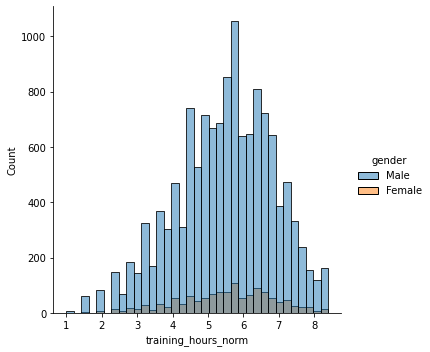

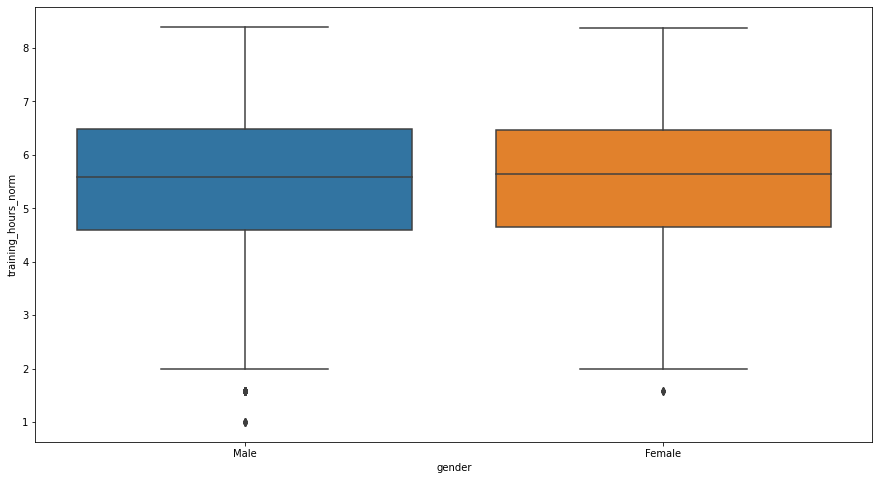

In [28]:
#Посмотрим на распределения
sub_data =  df[(df['gender']=='Male')|(df['gender']=='Female')]

sns.displot(sub_data, x='training_hours_norm', hue ='gender', bins=35)


plt.figure(figsize=(15, 8))
sns.boxplot(data=sub_data, x="gender", y="training_hours_norm");

In [29]:
#Проверим гипотезу о том, что те, кто работают в Funded Startup и в Early Stage Startup, в среднем учились одинаковое количество часов
Has_exp_norm = df[df['company_type']=='Funded Startup']['training_hours_norm']
No_exp_norm = df[df['company_type']=='Early Stage Startup']['training_hours_norm']

# Так как распределение теперь похоже на нормальное, то берем Критерий Стьюдента

t, p_value  = stats.ttest_ind(Has_exp_norm, No_exp_norm) # Критерий Стьюдента (t-test)

print('p-value', p_value)


alpha = 0.05

if p_value < alpha:
    print('Выборки отличаются!')

p-value 0.49608605350300516


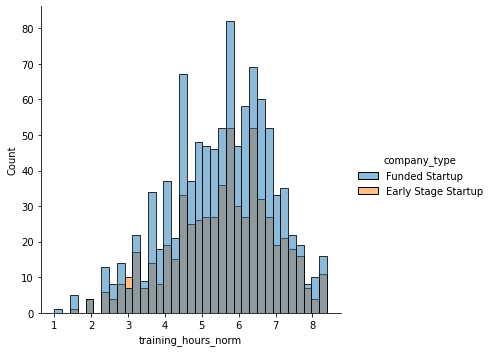

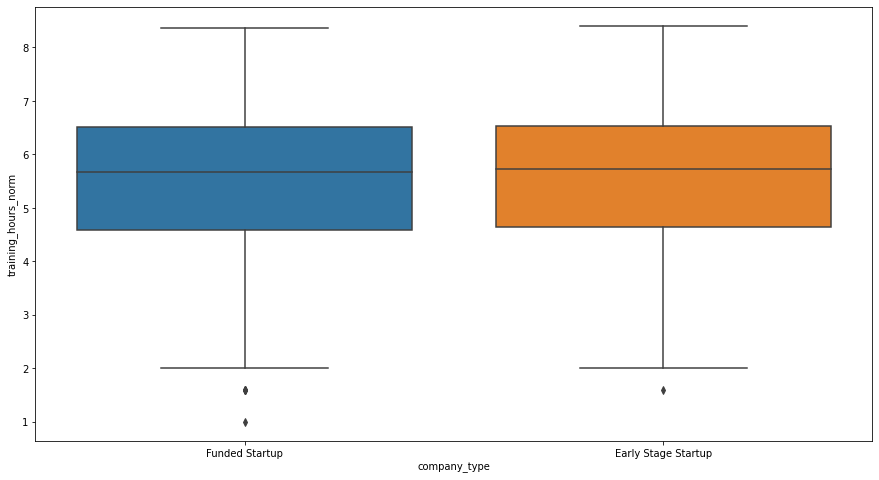

In [30]:
sub_data =  df[(df['company_type']=='Funded Startup')|(df['company_type']=='Early Stage Startup')]

sns.displot(sub_data, x='training_hours_norm', hue ='company_type', bins=35)


plt.figure(figsize=(15, 8))
sns.boxplot(data=sub_data, x="company_type", y="training_hours_norm");

In [31]:
#Проверим гипотезу о том, что те, кто работают в Public Sector и в Early Stage Startup, в среднем учились одинаковое количество часов
Has_exp_norm = df[df['company_type']=='Public Sector']['training_hours_norm']
No_exp_norm = df[df['company_type']=='Early Stage Startup']['training_hours_norm']

# Так как распределение теперь похоже на нормальное, то берем Критерий Стьюдента

t, p_value  = stats.ttest_ind(Has_exp_norm, No_exp_norm) # Критерий Стьюдента (t-test)

print('p-value', p_value)


alpha = 0.05

if p_value < alpha:
    print('Выборки отличаются!')

p-value 0.029987953040150835
Выборки отличаются!


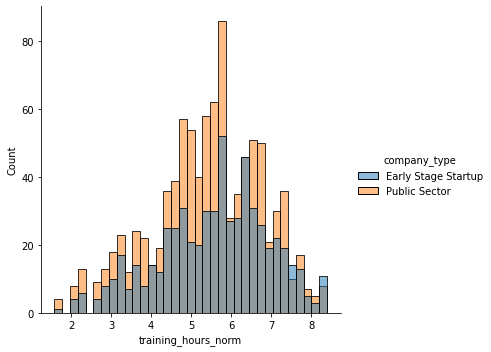

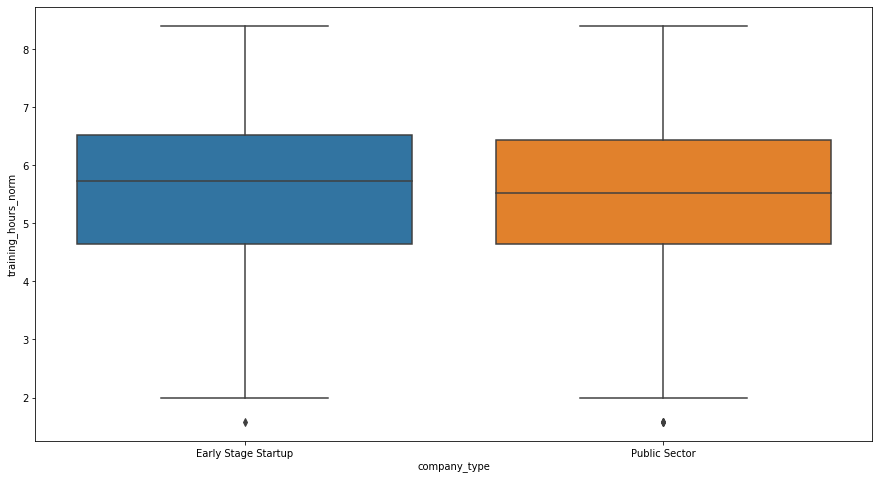

In [32]:
sub_data =  df[(df['company_type']=='Public Sector')|(df['company_type']=='Early Stage Startup')]

sns.displot(sub_data, x='training_hours_norm', hue ='company_type', bins=35)


plt.figure(figsize=(15, 8))
sns.boxplot(data=sub_data, x="company_type", y="training_hours_norm");

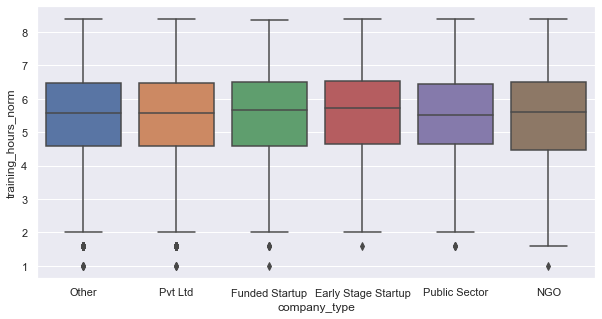

In [33]:
#Проверим, отличются ли распределения training_hours_norm в зависимости от company_type с помощью дисперсионного анализа
sns.set(rc={'figure.figsize':(10, 5)})
ax = sns.boxplot(x='company_type', y='training_hours_norm', data=df)

In [34]:
from scipy.stats import f_oneway

fvalue, pvalue = stats.f_oneway(df[df.company_type=='Early Stage Startup'].training_hours_norm,  df[df.company_type=='Funded Startup'].training_hours_norm, 
                                df[df.company_type=='Pvt Ltd'].training_hours_norm, df[df.company_type=='Other'].training_hours_norm,
                                df[df.company_type=='Public Sector'].training_hours_norm, df[df.company_type=='NGO'].training_hours_norm)

print(pvalue)

alpha = 0.05
if pvalue < alpha:
    print('Группы статистически значимо отличаются')

0.28444939901325034


In [35]:
#Проверим, что значение функции stats.f_oneway для двух переменных совпадают с критерием Стьюдента
fvalue, pvalue = stats.f_oneway(df[df.company_type=='Early Stage Startup'].training_hours_norm,
                                df[df.company_type=='Public Sector'].training_hours_norm)

print(pvalue)

t, p_value  = stats.ttest_ind(df[df.company_type=='Early Stage Startup'].training_hours_norm,
                                df[df.company_type=='Public Sector'].training_hours_norm) # Критерий Стьюдента (t-test)
print(p_value)

0.029987953040171957
0.029987953040150835


In [36]:
#Так как критерий Манна-Уитни работает не только с нормальными распределениями, проверим его значения на Funded Startup и Early Stage Startup
#с распределениями training_hours_norm и training_hours, а также гипотезу об одиноковом распределении в среднем
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(df[df['company_type']=='Funded Startup']['training_hours_norm'], df[df['company_type']=='Early Stage Startup']['training_hours_norm']) # U-тест Манна-Уитни
print('Statistics=%.3f, p=%.3f' % (stat, p))

stat, p = mannwhitneyu(df[df['company_type']=='Funded Startup']['training_hours'], df[df['company_type']=='Early Stage Startup']['training_hours']) # U-тест Манна-Уитни
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Интерпретируем
alpha = 0.05   # Уровень значимости
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=295734.500, p=0.500
Statistics=295734.500, p=0.500
Одинаковые распределения (не отвергаем H0)


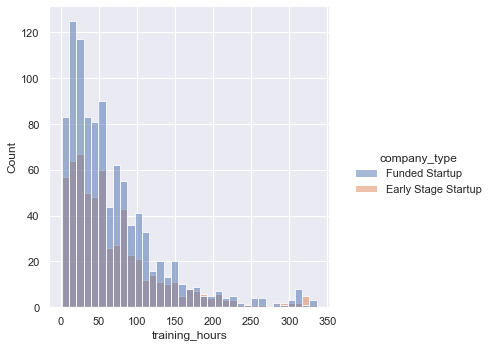

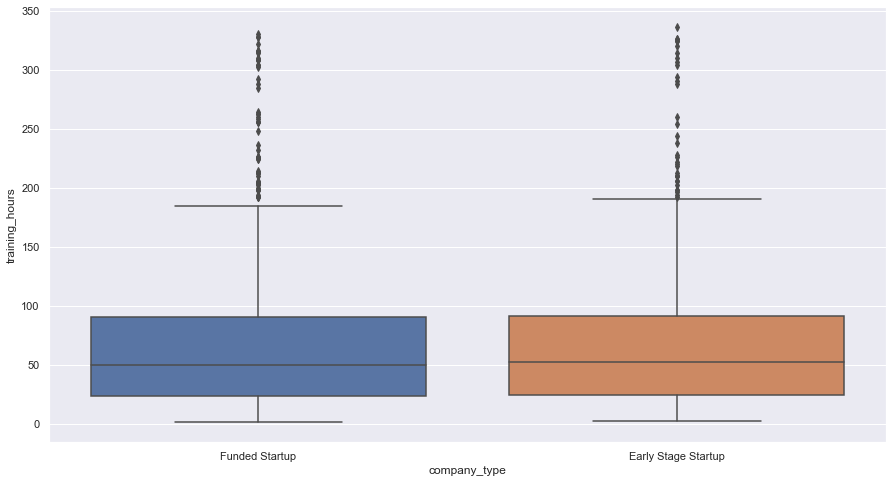

In [37]:
#Для training_hours_norm графики можно увидеть выше
sub_data =  df[(df['company_type']=='Funded Startup')|(df['company_type']=='Early Stage Startup')]

sns.displot(sub_data, x='training_hours', hue ='company_type', bins=35)


plt.figure(figsize=(15, 8))
sns.boxplot(data=sub_data, x="company_type", y="training_hours");

In [38]:
#Удалим искуственно созданный нами столбец training_hours_norm
df = df.drop(['training_hours_norm'], axis=1)

In [39]:
#Для обучения модели необходимо закодировать категориальные столбцы
from sklearn.preprocessing import LabelEncoder
def data_encoding(df):
  le = LabelEncoder()
  df['gender'] = le.fit_transform(df['gender'].values)
  df['relevent_experience'] = le.fit_transform(df['relevent_experience'].values)
  df['company_type'] = le.fit_transform(df['company_type'].values)

  #В некоторых столбцах важен порядко, поэтому закодируем их вручную
  education_level_mapping = {'Primary School': 1,'High School': 2,'Graduate': 3,'Masters': 4,'Phd': 5}
  df['education_level'] = df['education_level'].map(education_level_mapping)

  company_size_mapping = {'<10': 1,'10/49': 2,'50-99': 3, '100-500': 4,'500-999': 5,'1000-4999': 6,'5000-9999': 7,'10000+': 8}
  df['company_size'] = df['company_size'].map(company_size_mapping)

  enrolled_university_mapping = {'Full time course': 2, 'Part time course': 1, 'no_enrollment': 0}
  df['enrolled_university'] = df['enrolled_university'].map(enrolled_university_mapping)

  return df


In [40]:
train = data_encoding(df)

In [41]:
y_train = train.target
X_train = train.drop(['target'], axis=1)

In [42]:
#Так как у нас данные несбалансированы, воспользуемся методом SMOTE из библиотеки imblearn
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [43]:
#Используем для подбора гиперпараметров библиотеку optuna
import optuna
import lightgbm as lgbm
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold

In [46]:
from optuna.integration import LightGBMPruningCallback
from sklearn.metrics import roc_auc_score
def objective(trial, X, y):
    param_grid = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 10000, step=100),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 20, 200, step=20),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 200, 10000, step=100),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float(
            "bagging_fraction", 0.2, 0.95, step=0.1
        ),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float(
            "feature_fraction", 0.2, 0.95, step=0.1
        ),
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = lgbm.LGBMClassifier(objective='binary', **param_grid, silent=True)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_test, y_test)],
            eval_metric="auc",
            early_stopping_rounds=100,
            callbacks=[
                LightGBMPruningCallback(trial, "auc")
            ],  # Add a pruning callback
        )
        preds = model.predict(X_test)
        cv_scores[idx] = roc_auc_score(y_test, preds)

    return np.mean(cv_scores)

In [55]:
%%time
%%capture [--no-display]
#Используем в качестве метрики roc_auc_score, так как в соревновании на kaggle указана именно эта метрика
X = X_train.reset_index(drop=True)
y = y_train.reset_index(drop=True)
    
study = optuna.create_study(direction="maximize", study_name="LGBM Classifier")
func = lambda trial: objective(trial, X, y)
study.optimize(func, n_trials=20)

best_model = study.best_params
    
model = LGBMClassifier(**best_model, silent=True)
#model.fit(X, y)

[I 2021-12-03 18:20:07,341] A new study created in memory with name: LGBM Classifier
[I 2021-12-03 18:20:07,795] Trial 0 finished with value: 0.5 and parameters: {'n_estimators': 7900, 'learning_rate': 0.13328251641367136, 'num_leaves': 160, 'max_depth': 3, 'min_data_in_leaf': 8600, 'lambda_l1': 20, 'lambda_l2': 90, 'min_gain_to_split': 7.572593333131634, 'bagging_fraction': 0.2, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 0 with value: 0.5.
[I 2021-12-03 18:20:09,297] Trial 1 finished with value: 0.7010294586145067 and parameters: {'n_estimators': 600, 'learning_rate': 0.14270547313565027, 'num_leaves': 60, 'max_depth': 10, 'min_data_in_leaf': 2600, 'lambda_l1': 15, 'lambda_l2': 5, 'min_gain_to_split': 12.983994746507822, 'bagging_fraction': 0.30000000000000004, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 1 with value: 0.7010294586145067.
[I 2021-12-03 18:20:13,056] Trial 2 finished with value: 0.6974829144676763 and parameters: {'n_estimators': 4600, 'le

Wall time: 40.7 s


In [56]:
best_model

{'n_estimators': 2900,
 'learning_rate': 0.26406399295236144,
 'num_leaves': 20,
 'max_depth': 9,
 'min_data_in_leaf': 300,
 'lambda_l1': 35,
 'lambda_l2': 35,
 'min_gain_to_split': 4.328295076275792,
 'bagging_fraction': 0.6000000000000001,
 'bagging_freq': 1,
 'feature_fraction': 0.4}

In [59]:
%%capture [--no-display]
#Посмотрим результат на кросс-валидации
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

results = []
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=999)   
cv_results = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
results.append(cv_results)

In [60]:
print(results)

[array([0.84908297, 0.8422846 , 0.85492795, 0.84445992, 0.84970276])]


In [63]:
model = LGBMClassifier(**best_model, silent=True)
model.fit(X_train, y_train)

LGBMClassifier(bagging_fraction=0.6000000000000001, bagging_freq=1,
               feature_fraction=0.4, lambda_l1=35, lambda_l2=35,
               learning_rate=0.26406399295236144, max_depth=9,
               min_data_in_leaf=300, min_gain_to_split=4.328295076275792,
               n_estimators=2900, num_leaves=20)

In [66]:
#Загрузим тестовую выборку
test = pd.read_csv('aug_test.csv')

In [67]:
#Обработаем и закодируем тестовую выборку так же, как и обучающую
test = data_processing(test)
X_test = data_encoding(test)

In [68]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    2129 non-null   int32  
 1   city_development_index  2129 non-null   float64
 2   gender                  2129 non-null   int32  
 3   relevent_experience     2129 non-null   int32  
 4   enrolled_university     2129 non-null   int64  
 5   education_level         2129 non-null   int64  
 6   experience              2129 non-null   int32  
 7   company_size            2129 non-null   int64  
 8   company_type            2129 non-null   int32  
 9   last_new_job            2129 non-null   int32  
 10  training_hours          2129 non-null   int64  
dtypes: float64(1), int32(6), int64(4)
memory usage: 133.2 KB


In [69]:
y_pred = model.predict(X_test)

In [70]:
#Загрузим реальные ответы для тестовой выборки
y_true = np.load('jobchange_test_target_values.npy')

In [71]:
#Сравним наши результаты с реальными ответами
from sklearn.metrics import roc_auc_score
roc_auc_score(y_true, y_pred)

0.7249314722401088